In [2]:
import doClassification

seps = doClassification.main()

ERROR: no stars classified as main sequence O-type
ERROR: no stars classified as main sequence O-type
Separation is 73.65443318950277
Separation is 1554.9515797203399
Separation is 104.46485808708816
Separation is 146.54721972587097
Separation is 389.6287967686587
ERROR: no stars classified as main sequence O-type
Separation is 133.68211934376728
Separation is 283.39010558819393
ERROR: no stars classified as main sequence O-type
Separation is 206.61814164978628
Separation is 125.20564241047269
Separation is 314.3732082488211
Separation is 120.29371584051627
Separation is 159.6914540600468
Separation is 181.97148808699652
Separation is 34.13381259009261
Separation is 108.94810150083674
Separation is 99.4146562741938
Separation is 574.7014165677623
Separation is 77.62841642554719
Separation is 326.12214718270405
Separation is 181.8448032031341
Separation is 47.05942596898997
Separation is 127.5682866717632
Separation is 488.41539027365536
Separation is 40.22255123577067
Separation is 101

In [4]:
import matplotlib.pyplot as plt
import matplotlib
from matplotlib import rc
from matplotlib.ticker import MultipleLocator,AutoMinorLocator
import matplotlib.patches as mpatches
from matplotlib.legend_handler import HandlerPatch
from matplotlib.lines import Line2D

from astropy.io import ascii
from astropy.table import Table, Column, vstack, unique
import numpy as np
import re
import matplotlib.cm as cm
import sys

def import_snana(filename):
    start_data = False
    table = None
    
    with open(filename) as f:
        for i,line in enumerate(f):
            if 'VARLIST' in line:
                header = line.split()
                header = header[0:9]
                dummy = [['X'*20]]*len(header)
                table = Table(dummy, names=header).copy()[:0]
            elif table is not None:
                data=line.split()
                data=data[0:9]
                if len(data)!=9:
                    break
                table.add_row(data)
        
    mask = np.array([r['MAGERR'] is not None for r in table])
    table = table[mask]
                
    
    table['MJD']    = table['MJD'].astype(float)
    table['MAG']    = table['MAG'].astype(float)
    table['MAGERR'] = table['MAGERR'].astype(float)
    table['FLUXCALERR'] = table['MAGERR'].astype(float)
    table['FLUXCAL'] = table['MAGERR'].astype(float)
    table['MAGSYS'] = table['MAGSYS'].astype(str)

    return(table)

def ccolor(r,g,b):
    return((r/255.,g/255.,b/255., 1.0))

black=ccolor(0,0,0)
red=ccolor(255,0,0)
blue=ccolor(50,50,255)
green=ccolor(144,238,144)
magenta=ccolor(204,0,204)
goldenrod=ccolor(239,139,8)
orange=ccolor(204,102,0)

# Plotting parameters and functions
pad = 0.25
figsize = 10.0
rc('font',**{'family':'serif','serif':['Times'],'size':6.0*figsize})
rc('text', usetex=True, color=black)

def setup_plot(size=[1.8, 1.5]):

    fig, ax = plt.subplots()
    for i in ax.spines.keys(): ax.spines[i].set_linewidth(0.6*figsize)
    fig.set_size_inches(size[0]*figsize, size[1]*figsize)

    return(fig, ax)

def setup_ticks(ax):

    ax.xaxis.set_minor_locator(AutoMinorLocator())
    ax.yaxis.set_minor_locator(AutoMinorLocator())

    ax.tick_params(direction='in', length=1.5*figsize,
            width=0.5*figsize, which='major', axis='both', colors=black,
            pad=0.3*figsize, top=True, bottom=True, left=True, right=True)
    ax.tick_params(direction='in', length=0.75*figsize,
            width=0.5*figsize, which='minor', axis='both', colors=black,
            pad=0.3*figsize, top=True, bottom=True, left=True, right=True)

def setup_axis_titles(ax, xtitle, ytitle):

        ax.set_xlabel(xtitle, labelpad=pad)
        ax.set_ylabel(ytitle, labelpad=pad)

[  7.64872616  15.34715942  34.13381259  38.69784903  40.22255124
  47.05942597  73.65443319  77.62841643  92.76926894  99.41465627
 101.33423235 104.46485809 108.9481015  120.29371584 122.84217604
 125.20564241 127.56828667 133.40300256 133.68211934 144.78622328
 146.54721973 159.69145406 181.8448032  181.97148809 206.61814165
 221.31626851 283.39010559 302.7764084  314.37320825 326.12214718
 358.56732264 389.62879677 488.41539027 574.70141657]


<Figure size 432x288 with 0 Axes>

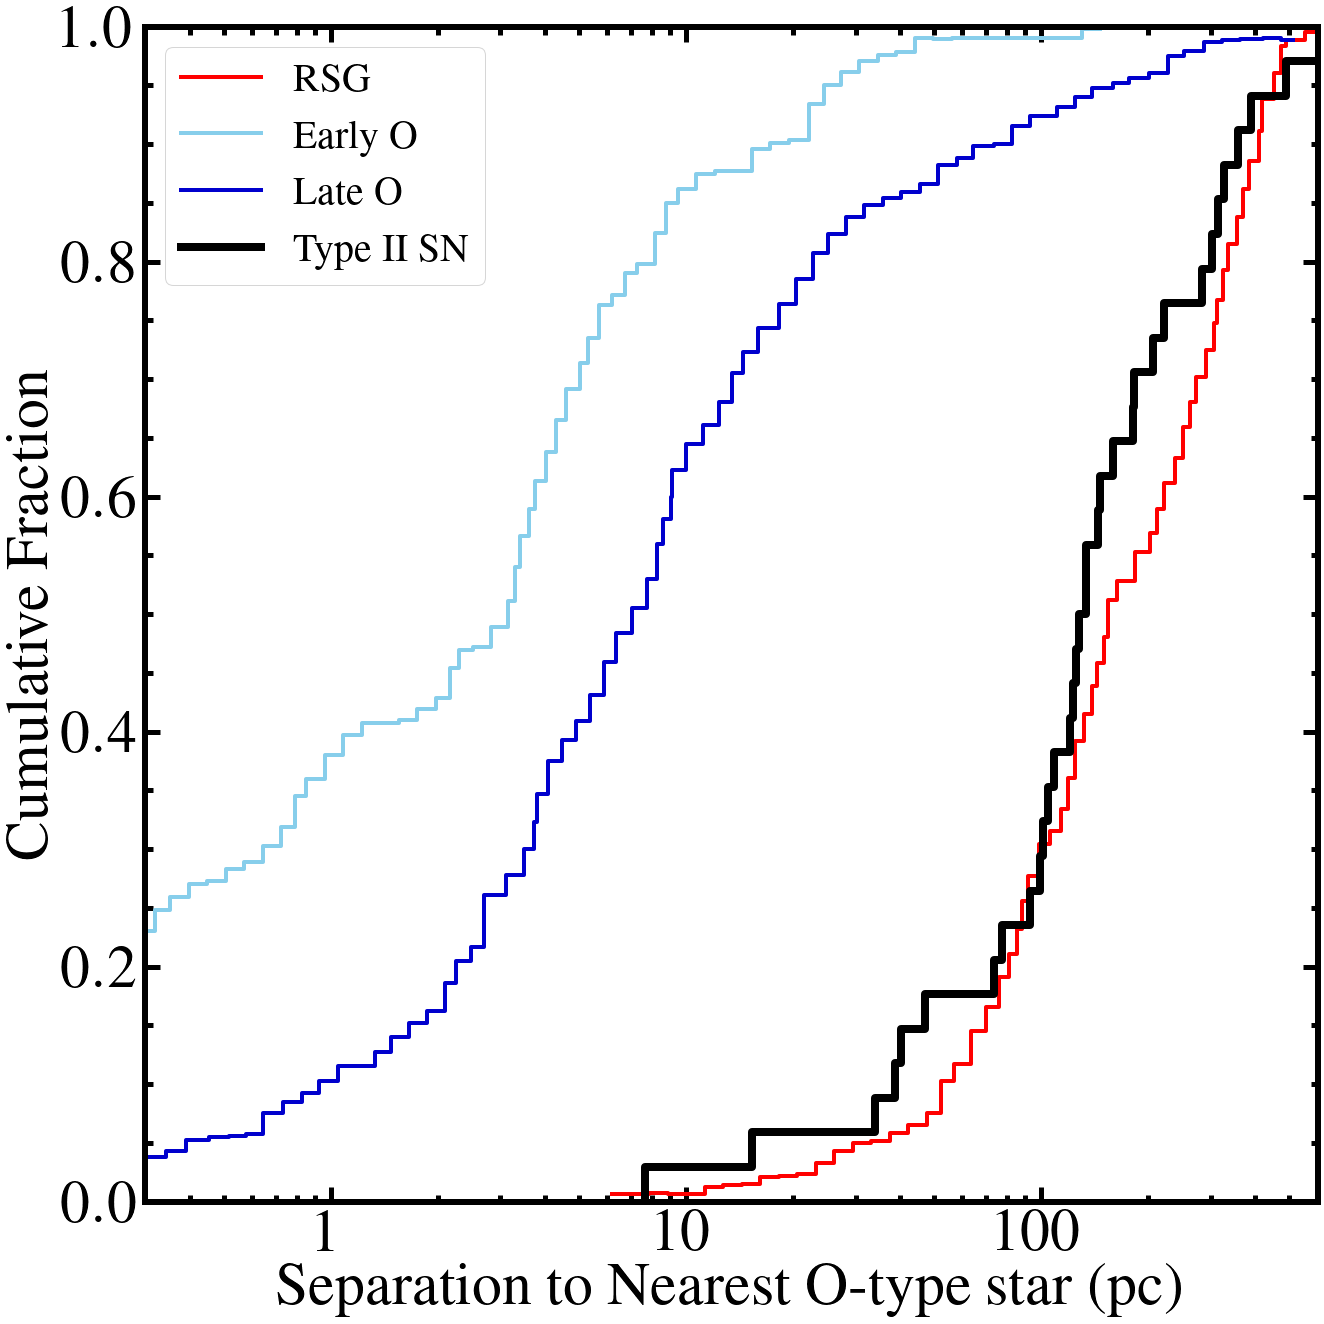

In [28]:
import glob

plt.clf()

sep_data = [s[1] for s in seps if s[1] is not None]
sep_data = np.array(sorted(sep_data))
mask = sep_data < 600
sep_data = sep_data[mask]
print(sep_data)

cum_data = np.array([1.0*i/len(sep_data) for i in np.arange(len(sep_data))])

def setup_ticks(ax):

    ax.xaxis.set_minor_locator(AutoMinorLocator())
    ax.yaxis.set_minor_locator(AutoMinorLocator())

    ax.tick_params(direction='in', length=1.5*figsize,
            width=0.5*figsize, which='major', axis='both', colors=black,
            pad=0.8*figsize, top=True, bottom=True, left=True, right=True)
    ax.tick_params(direction='in', length=0.75*figsize,
            width=0.5*figsize, which='minor', axis='both', colors=black,
            pad=0.8*figsize, top=True, bottom=True, left=True, right=True)

# Set up periodogram plot parameters
rc('font',**{'family':'serif','serif':['Times'],'size':6.0*figsize})
rc('text', usetex=True, color=black)
fig, ax = setup_plot(size=[2.0, 2.0])

setup_axis_titles(ax, 'Separation to Nearest O-type star (pc)','Cumulative Fraction')
setup_ticks(ax)

for f in glob.glob('histograms/*.txt'):
    table = Table.read(f, format='csv', names=('separation','fraction'))
    table.sort('separation')
    
    if 'rsg' in f:
        label = 'RSG'
        color='red'
    elif 'late-o' in f:
        label = 'Late O'
        color='mediumblue'
    elif 'early-o' in f:
        label = 'Early O'
        color='skyblue'
    
    ax.step(table['separation'], table['fraction'], label=label, color=color,
           linewidth=4)

ax.step(sep_data, cum_data, color='black', label='Type II SN', linewidth=8)

ax.set_ylim(0, 1.0)
ax.set_xlim(0.3,600)
ax.set_xscale('log')

ax.set_xticks([1,10,100])
ax.set_xticklabels(['1','10','100'])

plt.legend(loc='best', fontsize=4.0*figsize)
plt.tight_layout()

plt.savefig('cumulative-histogram.png')